<table align="center">
  <a target="_blank" href="https://colab.research.google.com/github/martinlf6/schwab-ds-takehome-FengLiu/blob/main/01_eda.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a>
</table>

In [1]:
# Downgrade the datasets library to v3.x in order to load the dataset successfully
!pip install datasets==3.6.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import os, re, string, numpy as np, pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
# A) Load dataset
ds = load_dataset('takala/financial_phrasebank', 'sentences_allagree') # 'sentences_allagree' means only sentences where all annotators agreed on the sentiment label are included in the loaded dataset. ds is now a DatasetDict object with splits like "train"
df = ds["train"].to_pandas().rename(columns={"sentence":"text","label":"y"}) # Convert to Pandas dataframe. ds["train"] selects the training split of the dataset
label_map = {0: "negative", 1: "neutral", 2: "positive"} # Create a mapping from numbers to labels
df["label"] = df["y"].map(label_map) # Apply the mapping: replaces each numeric value in column y with its text label and creates a new column label with human-readable sentiment.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

financial_phrasebank.py: 0.00B [00:00, ?B/s]

The repository for takala/financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/takala/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [3]:
df

,text,y,label
0,"According to Gran , the company has no plans t...",1,neutral
1,"For the last quarter of 2010 , Componenta 's n...",2,positive
2,"In the third quarter of 2010 , net sales incre...",2,positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive
...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative


In [4]:
# B) Quick stats
print(df.head())
print(df["label"].value_counts())
df["len"] = df["text"].str.split().apply(len) # apply(len) applies the built-in Python len() function to each list in text column (sentence) that gives the number of words in the sentence.
print(df["len"].describe())


                                                text  y     label
0  According to Gran , the company has no plans t...  1   neutral
1  For the last quarter of 2010 , Componenta 's n...  2  positive
2  In the third quarter of 2010 , net sales incre...  2  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  2  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  2  positive
label
neutral     1391
positive     570
negative     303
Name: count, dtype: int64
count    2264.000000
mean       22.441696
std        10.147048
min         2.000000
25%        15.000000
50%        21.000000
75%        28.000000
max        81.000000
Name: len, dtype: float64


In [5]:
df

,text,y,label,len
0,"According to Gran , the company has no plans t...",1,neutral,25
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,39
2,"In the third quarter of 2010 , net sales incre...",2,positive,29
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,24
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,22
...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,27
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,40
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,26
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,23


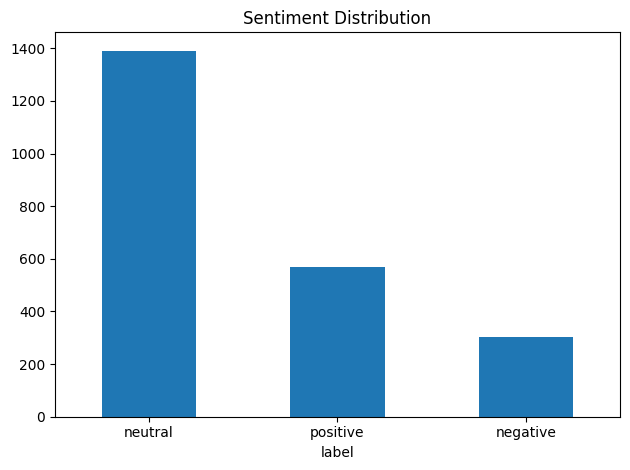

In [16]:
# C) Visualize sentiment distribution
plt.figure()
df["label"].value_counts().plot(kind="bar", rot=0, title="Sentiment Distribution")
plt.tight_layout()
plt.show()


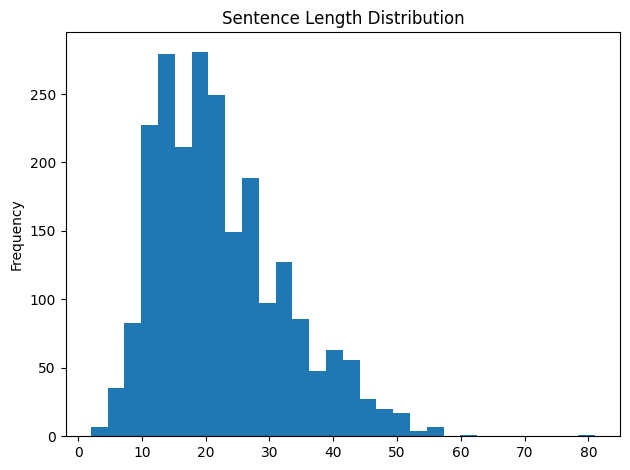

In [15]:
# D) Sentence length histogram
plt.figure()
df["len"].plot(kind="hist", bins=30, title="Sentence Length Distribution")
plt.tight_layout()
plt.show()


In [26]:
# E) Common words per class (very simple bag-of-words view)
def normalize(s):
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)
    return s

stop = set(ENGLISH_STOP_WORDS) | {"s","said","u","’s","—","–","..."}
def top_terms(subset, k=25):
    all_tokens = []
    for t in subset["text"].map(normalize):
        toks = [w for w in t.split() if w not in stop and not w.isdigit()]
        all_tokens.extend(toks)
    return Counter(all_tokens).most_common(k)

for lab in ["negative","neutral","positive"]:
    print(f"\nTop tokens for {lab}:")
    print(top_terms(df[df["label"]==lab], k=20))



Top tokens for negative:
[('eur', 251), ('mn', 186), ('profit', 122), ('net', 84), ('sales', 72), ('year', 72), ('quarter', 71), ('operating', 68), ('mln', 62), ('period', 58), ('million', 57), ('finnish', 57), ('decreased', 52), ('loss', 51), ('compared', 42), ('m', 40), ('company', 38), ('oyj', 35), ('fell', 35), ('corresponding', 34)]

Top tokens for neutral:
[('company', 225), ('eur', 130), ('finland', 109), ('shares', 105), ('business', 97), ('group', 95), ('million', 91), ('services', 82), ('share', 77), ('market', 61), ('sales', 60), ('finnish', 59), ('new', 59), ('value', 59), ('m', 58), ('total', 56), ('capital', 52), ('products', 49), ('financial', 49), ('helsinki', 45)]

Top tokens for positive:
[('eur', 375), ('mn', 223), ('profit', 172), ('net', 166), ('year', 155), ('sales', 129), ('period', 125), ('million', 118), ('m', 116), ('finnish', 108), ('operating', 103), ('mln', 99), ('quarter', 89), ('company', 86), ('rose', 82), ('increased', 74), ('loss', 60), ('correspondin

<h2 id="BSO">Beautiful Soup Objects</h2>


Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML.  We can navigate the HTML as a tree and/or filter out what we are looking for.

Consider the following HTML:


In [ ]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

We can store it as a string in the variable HTML:


In [ ]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the <code>BeautifulSoup</code> constructor, the <code>BeautifulSoup</code> object, which represents the document as a nested data structure:


In [ ]:
soup = BeautifulSoup(html, "html.parser")

First, the document is converted to Unicode, (similar to ASCII),  and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The <code>BeautifulSoup</code> object can create other types of objects. In this lab, we will cover <code>BeautifulSoup</code> and <code>Tag</code> objects that for the purposes of this lab are identical, and <code>NavigableString</code> objects.


We can use the method <code>prettify()</code> to display the HTML in the nested structure:


In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



## Tags


Let's say we want the  title of the page and the name of the top paid player we can use the <code>Tag</code>. The <code>Tag</code> object corresponds to an HTML tag in the original document, for example, the tag title.


In [ ]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type <code>bs4.element.Tag</code>


In [ ]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one <code>Tag</code>  with the same name, the first element with that <code>Tag</code> name is called, this corresponds to the most paid player:


In [ ]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute <code>b</code>, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name.


### Children, Parents, and Siblings


As stated above the <code>Tag</code> object is a tree of objects we can access the child of the tag or navigate down the branch as follows:


In [ ]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

You can access the parent with the <code> parent</code>


In [ ]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

this is identical to


In [ ]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

<code>tag_object</code> parent is the <code>body</code> element.


In [ ]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

<code>tag_object</code> sibling is the <code>paragraph</code> element


In [ ]:
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

`sibling_2` is the `header` element which is also a sibling of both `sibling_1` and `tag_object`


In [ ]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

<h3 id="first_question">Exercise: <code>next_sibling</code></h3>


Using the object <code>sibling\_2</code> and the property <code>next_sibling</code> to find the salary of Stephen Curry:


In [ ]:
sibling_2.next_sibling

<p> Salary: $85,000, 000 </p>

<details><summary>Click here for the solution</summary>

```
sibling_2.next_sibling

```

</details>


### HTML Attributes


If the tag has attributes, the tag <code>id="boldest"</code> has an attribute <code>id</code> whose value is <code>boldest</code>. You can access a tag’s attributes by treating the tag like a dictionary:


In [ ]:
tag_child['id']

'boldest'

You can access that dictionary directly as <code>attrs</code>:


In [ ]:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attribute check out <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">\[1]</a> for more.


We can also obtain the content if the attribute of the <code>tag</code> using the Python <code>get()</code> method.


In [ ]:
tag_child.get('id')

'boldest'

### Navigable String


A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the <code>NavigableString</code> class to contain this text. In our HTML we can obtain the name of the first player by extracting the sting of the <code>Tag</code> object <code>tag_child</code> as follows:


In [ ]:
tag_string=tag_child.string
tag_string

'Lebron James'

we can verify the type is Navigable String


In [ ]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is just like a Python string or Unicode string, to be more precise. The main difference is that it also supports some  <code>BeautifulSoup</code> features. We can covert it to sting object in Python:


In [ ]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

<h2 id="filter">Filter</h2>


Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string.  Consider the following HTML of rocket launchs:


In [ ]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
   </tr>
  <tr>
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable <code>table</code>:


In [ ]:
table="<table><tr><td id='flight' >Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td><td>80 kg</td></tr></table>"

In [ ]:
table_bs = BeautifulSoup(table, "html.parser")

## find All


The <code>find_all()</code> method looks through a tag’s descendants and retrieves all descendants that match your filters.

<p>
The Method signature for <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>


### Name


When we set the <code>name</code> parameter to a tag name, the method will extract all the tags with that name and its children.


In [ ]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a <code>tag</code> object:


In [ ]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>

The type is <code>tag</code>


In [ ]:
print(type(first_row))

<class 'bs4.element.Tag'>


we can obtain the child


In [ ]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:


In [ ]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)


row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>
row 1 is <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>


As <code>row</code> is a <code>cell</code> object, we can apply the method <code>find_all</code> to it and extract table cells in the object <code>cells</code> using the tag <code>td</code>, this is all the children with the name <code>td</code>. The result is a list, each element corresponds to a cell and is a <code>Tag</code> object, we can iterate through this list as well. We can extract the content using the <code>string</code>  attribute.


In [ ]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.


In [ ]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>,
 <td>80 kg</td>]

## Attributes


If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example the <code>id</code>  argument, Beautiful Soup will filter against each tag’s <code>id</code> attribute. For example, the first <code>td</code> elements have a value of <code>id</code> of <code>flight</code>, therefore we can filter based on that <code>id</code> value.


In [ ]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:


In [ ]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

If we set the  <code>href</code> attribute to True, regardless of what the value is, the code finds all tags with <code>href</code> value:


In [ ]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

There are other methods for dealing with attributes and other related methods; Check out the following <a href='https://www.crummy.com/software/BeautifulSoup/bs4/doc/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01#css-selectors'>link</a>


<h3 id="exer_type">Exercise: <code>find_all</code></h3>


Using the logic above, find all the elements without <code>href</code> value


In [ ]:
table_bs.find_all('a', href=False)

[]

<details><summary>Click here for the solution</summary>

```
table_bs.find_all('a', href=False)

```

</details>


Using the soup object <code>soup</code>, find the element with the <code>id</code> attribute content set to <code>"boldest"</code>.


In [ ]:
soup.find_all(id="boldest")

[<b id="boldest">Lebron James</b>]

<details><summary>Click here for the solution</summary>

```
soup.find_all(id="boldest")

```

</details>


### string


With string you can search for strings instead of tags, where we find all the elments with Florida:


In [ ]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

## find


The <code>find_all()</code> method scans the entire document looking for results, it’s if you are looking for one element you can use the <code>find()</code> method to find the first element in the document. Consider the following two table:


In [ ]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>


<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td>
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign <code>two_tables</code>:


In [ ]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

We create a <code>BeautifulSoup</code> object  <code>two_tables_bs</code>


In [ ]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table


In [ ]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore.


In [ ]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

<h2 id="DSCW">Downloading And Scraping The Contents Of A Web Page</h2>


We Download the contents of the web page:


In [ ]:
url = "https://web.archive.org/web/20230224123642/https://www.ibm.com/us-en/"

We use <code>get</code> to download the contents of the webpage in text format and store in a variable called <code>data</code>:


In [ ]:
data  = requests.get(url).text

We create a <code>BeautifulSoup</code> object using the <code>BeautifulSoup</code> constructor


In [ ]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape all links


In [ ]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))


https://web.archive.org/web/20230224123642/https://www.ibm.com/reports/threat-intelligence/
https://web.archive.org/web/20230224123642/https://www.ibm.com/about
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/strategy/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/ibmix?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/technology/
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/operations/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/strategic-partnerships
https://web.archive.org/web/20230224123642/https://www.ibm.com/employment/?lnk=flatitem
https://web.archive.org/web/20230224123642/https://www.ibm.com/impact
https://web.archive.org/web/20230224123642/https://research.ibm.com/
https://web.archive.org/web/20230224123642/https://www.ibm.com/


## Scrape  all images  Tags


In [ ]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

<img alt="Person standing with arms crossed" aria-describedby="bx--image-1" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg
<img alt="Team members at work in a conference room" aria-describedby="bx--image-2" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg
<img alt="Coworkers looking at laptops" aria-describedby="bx--image-3" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOp

## Scrape data from HTML tables


In [ ]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check how many rows and columns are there in the color table.


In [ ]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data,"html.parser")

In [ ]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [ ]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


## Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas


In [ ]:
import pandas as pd

In [ ]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check the tables on the webpage.


In [ ]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data,"html.parser")

In [ ]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [ ]:
# we can see how many tables were found by checking the length of the tables list
len(tables)

26

Assume that we are looking for the `10 most densly populated countries` table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.


In [ ]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

5


See if you can locate the table name of the table, `10 most densly populated countries`, below.


In [ ]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_106-0">
   <a href="#cite_note-:10-106">
    <span class="cite-bracket">
     [
    </span>
    101
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon nowrap">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600"

In [ ]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        rank = col[0].text.strip()
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()

        # Create a temporary DataFrame for the new row
        new_row = pd.DataFrame([{"Rank": rank, "Country": country, "Population": population, "Area": area, "Density": density}])

        # Use concat
        population_data = pd.concat([population_data, new_row], ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][102],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,Israel,"9,402,617","21,937",429
9,10,India,"1,389,637,446","3,287,263",423


## Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html


Using the same `url`, `data`, `soup`, and `tables` object as in the last section we can use the `read_html` function to create a DataFrame.

Remember the table we need is located in `tables[table_index]`

We can now use the `pandas` function `read_html` and give it the string version of the table as well as the `flavor` which is the parsing engine `bs4`.


In [ ]:
pd.read_html(str(tables[5]), flavor='bs4')

[   Rank                 Country  Population  Area (km2)  Density (pop/km2)
 0     1               Singapore     5921231         719               8235
 1     2              Bangladesh   165650475      148460               1116
 2     3  Palestine[note 3][102]     5223000        6025                867
 3     4          Taiwan[note 4]    23580712       35980                655
 4     5             South Korea    51844834       99720                520
 5     6                 Lebanon     5296814       10400                509
 6     7                  Rwanda    13173730       26338                500
 7     8                 Burundi    12696478       27830                456
 8     9                  Israel     9402617       21937                429
 9    10                   India  1389637446     3287263                423]

The function `read_html` always returns a list of DataFrames so we must pick the one we want out of the list.


In [ ]:
population_data_read_html = pd.read_html(str(tables[5]), flavor='bs4')[0]

population_data_read_html

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


## Scrape data from HTML tables into a DataFrame using read_html


We can also use the `read_html` function to directly get DataFrames from a `url`.


In [ ]:
dataframe_list = pd.read_html(url, flavor='bs4')

We can see there are 25 DataFrames just like when we used `find_all` on the `soup` object.


In [ ]:
len(dataframe_list)

26

Finally we can pick the DataFrame we need out of the list.


In [ ]:
dataframe_list[5]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


We can also use the `match` parameter to select the specific table we want. If the table contains a string matching the text it will be read.


In [ ]:
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423
